In [2]:
# 패키지 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
mpg = pd.read_csv("mpg.csv")
economics = pd.read_csv("economics.csv")

### 1. 어떤 회사에서 생산한 'SUV' 차종의 도시 연비가 높은지 알아보려고 합니다.'suv' 차종을 대상으로 'cty'(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요. 막대는 연비가 높은 순으로 정렬하세요. (집단별 평균표도 출력해서 확인해 보세요)

In [3]:
# SUV만 추출 → 회사별 cty 평균
df_suv = mpg.query("category == 'suv'") \
             .groupby('manufacturer', as_index = False) \
             .agg(mean_cty = ('cty', 'mean'))

# 내림차순 정렬 → 상위 5
df_suv = df_suv.sort_values('mean_cty', ascending = False).head(5)

# 집단별 평균표 출력
df_suv

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


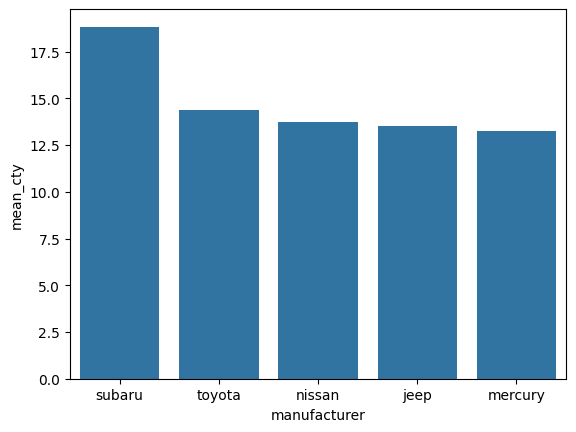

In [4]:
# 막대 그래프
sns.barplot(data = df_suv, x = 'manufacturer', y = 'mean_cty')
plt.show()

### 2. 자동차 중에 어떤 'category'(자동차 종류)가 많은지 알아보려고 합니다. `sns.barplot()`을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요. 막대는 빈도가 높은 순으로 정렬하세요. (집단별 빈도표도 출력해서 확인해 보세요)

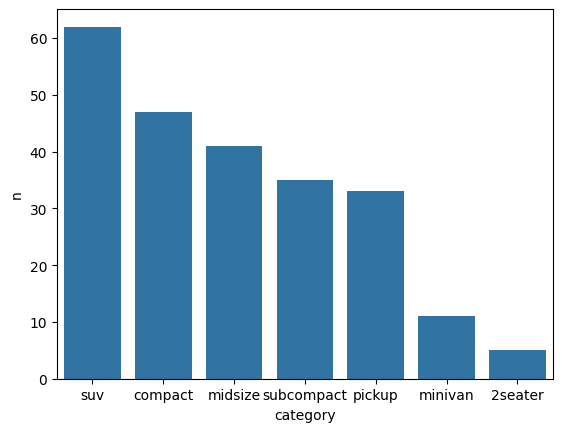

In [ ]:
# category별 빈도표
df_cat = mpg.groupby('category', as_index = False) \
            .agg(n = ('category', 'count')) \
            .sort_values('n', ascending = False)

# 빈도표 출력
df_cat

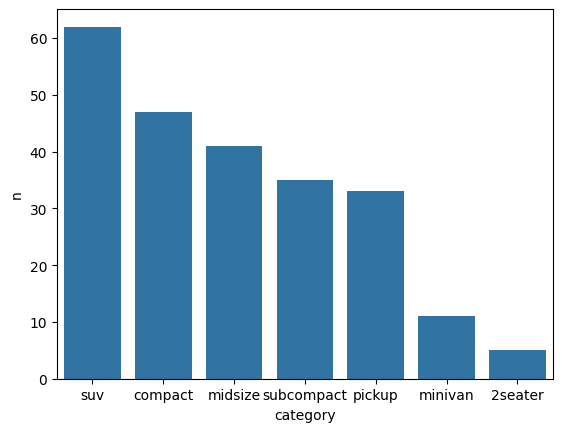

In [8]:
# 막대 그래프 (빈도 높은 순 정렬)
sns.barplot(data = df_cat, x = 'category', y = 'n', order = df_cat['category'])
plt.show()

### 3. 'psavert'(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다. 연도별 개인 저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요. (신뢰구간을 제거해 주세요

<Axes: xlabel='year', ylabel='mean_psavert'>

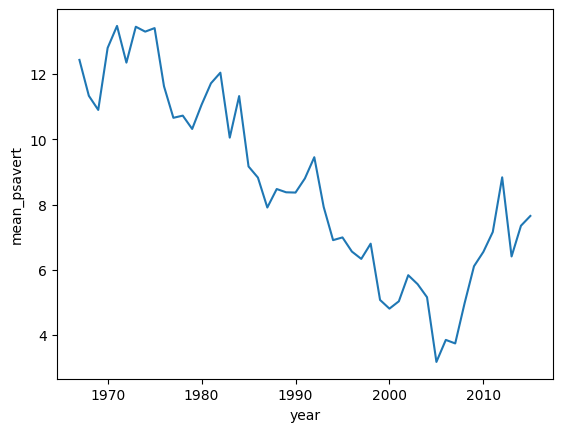

In [6]:
# date를 datetime으로 변환 → 연도 추출
economics['date'] = pd.to_datetime(economics['date'])
economics['year'] = economics['date'].dt.year

# 연도별 평균 psavert
df_psavert = economics.groupby('year', as_index = False) \
                      .agg(mean_psavert = ('psavert', 'mean'))

# 그래프 (신뢰구간 제거)
sns.lineplot(data=df_psavert, x='year', y='mean_psavert', errorbar=None)

### 4. 2014년 월별 'psavert'의 변화를 나타낸 시계열 그래프를 만들어 보세요. (신뢰구간을 제거해 주세요) (Tip! df.query()로 2014년 데이터를 추출하면 됩니다.)

<Axes: xlabel='month', ylabel='psavert'>

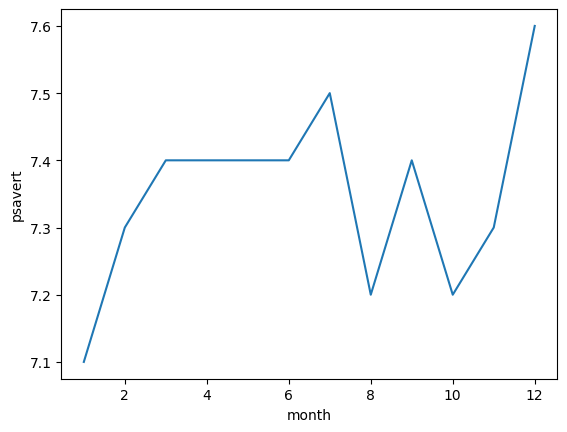

In [7]:
# 2014년 데이터만 추출
df_2014 = economics.query("year == 2014").copy()
df_2014['month'] = df_2014['date'].dt.month

# 그래프 (신뢰구간 제거)
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', errorbar= None)